# Install Dependencies

In [ ]:
!pip install tensorflow-gpu
!pip install scikitplot

# Setup keras and load the data

In [ ]:
from google.colab import files
files.upload()
!mkdir -p  ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp
!unzip emotions-dataset-for-nlp.zip

Saving kaggle.json to kaggle.json
  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 104MB/s]
Archive:  emotions-dataset-for-nlp.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 


# Load Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from  tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout
import os
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Loa Dataset

In [ ]:
train_df  = pd.read_csv('train.txt',header=None,sep=';',names = ['Input','Sentiment'], encoding='utf-8')
test_df=pd.read_csv('test.txt',header=None,sep=';',names = ['Input','Sentiment'], encoding='utf-8')
val_df = pd.read_csv('val.txt',header=None,sep=';',names = ['Input','Sentiment'], encoding='utf-8')
train_df.head()

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


# View dataset distribution of labels

In [ ]:

print("####### for Train ########")
print(train_df.Sentiment.value_counts())
print("####### for Test ########")
print(test_df.Sentiment.value_counts())
print("####### for Validation ########")
print(val_df.Sentiment.value_counts())

####### for Train ########
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Sentiment, dtype: int64
####### for Test ########
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: Sentiment, dtype: int64
####### for Validation ########
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: Sentiment, dtype: int64


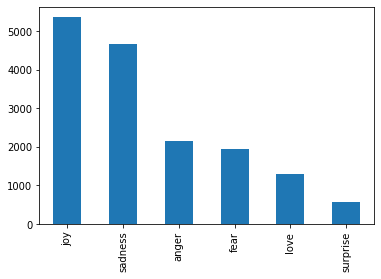

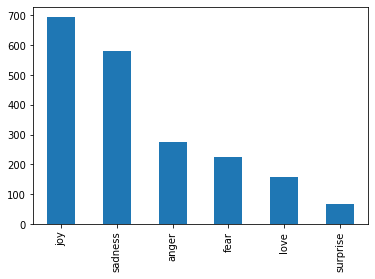

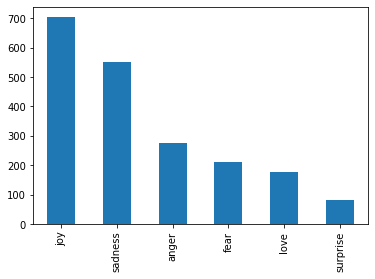

In [ ]:
train_df.Sentiment.value_counts().plot(kind='bar')
plt.show()
test_df.Sentiment.value_counts().plot(kind='bar')
plt.show()
val_df.Sentiment.value_counts().plot(kind='bar')
plt.show()

# Preporcess Train Data

In [ ]:
X =train_df['Input']
tokenizer=Tokenizer(15000,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(X)
X_train=tokenizer.texts_to_sequences(X)
X_train_pad=pad_sequences(X_train,maxlen=80,padding='post')

Y_train=train_df.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
Y_train_f=to_categorical(Y_train)
Y_train_f[:6]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

# Preporcess Validation Data

In [ ]:
X_val=val_df['Input']
X_val_f=tokenizer.texts_to_sequences(X_val)
X_val_pad=pad_sequences(X_val_f,maxlen=80,padding='post')

Y_val=val_df.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
Y_val_f=to_categorical(Y_val)
Y_val_f[:6]


array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

# Model Creation

In [ ]:
model=Sequential()
model.add(Embedding(15000,64,input_length=80))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(6,activation='softmax'))
print(model.summary())
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 80, 64)            960000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 64)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 80, 160)           92800     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 320)               410880    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1926      
Total params: 1,465,606
Trainable params: 1,465,606
Non-trainable params: 0
_________________________________________________________________
None


# Training

In [ ]:
hist=model.fit(X_train_pad,Y_train_f,epochs=12,validation_data=(X_val_pad,Y_val_f))

Epoch 1/12
500/500 [==============================] - 175s 342ms/step - loss: 1.4740 - accuracy: 0.4061 - val_loss: 0.7534 - val_accuracy: 0.7305
Epoch 2/12
500/500 [==============================] - 164s 328ms/step - loss: 0.6298 - accuracy: 0.7738 - val_loss: 0.3213 - val_accuracy: 0.8755
Epoch 3/12
500/500 [==============================] - 165s 330ms/step - loss: 0.3004 - accuracy: 0.8934 - val_loss: 0.2287 - val_accuracy: 0.9145
Epoch 4/12
500/500 [==============================] - 164s 328ms/step - loss: 0.2041 - accuracy: 0.9290 - val_loss: 0.2022 - val_accuracy: 0.9255
Epoch 5/12
500/500 [==============================] - 163s 326ms/step - loss: 0.1573 - accuracy: 0.9399 - val_loss: 0.1894 - val_accuracy: 0.9255
Epoch 6/12
500/500 [==============================] - 163s 326ms/step - loss: 0.1231 - accuracy: 0.9533 - val_loss: 0.1955 - val_accuracy: 0.9275
Epoch 7/12
500/500 [==============================] - 163s 326ms/step - loss: 0.1000 - accuracy: 0.9626 - val_loss: 0.1699 -

# Visualize training

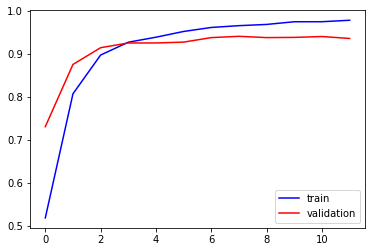

In [ ]:
plt.plot(hist.history['accuracy'],c='b',label='train')
plt.plot(hist.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

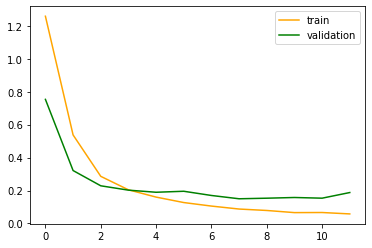

In [ ]:
plt.plot(hist.history['loss'],c='orange',label='train')
plt.plot(hist.history['val_loss'],c='g',label='validation')
plt.legend(loc='upper right')
plt.show()

# Preprocxess n test the model

In [ ]:
X_test=test_df['Input']
Y_test=test_df.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
X_test_f=tokenizer.texts_to_sequences(X_test)
X_test_pad=pad_sequences(X_test_f,maxlen=80,padding='post')
Y_test_f=to_categorical(Y_test)
print(X_test_pad.shape)
Y_test_f[:7]
model.evaluate(X_test_pad,Y_test_f)


(2000, 80)
63/63 [==============================] - 6s 95ms/step - loss: 0.2050 - accuracy: 0.9320


[0.2050272673368454, 0.9319999814033508]

In [ ]:
Y_pred=model.predict_classes(X_test_pad)

In [65]:
labels

<function dict.keys>

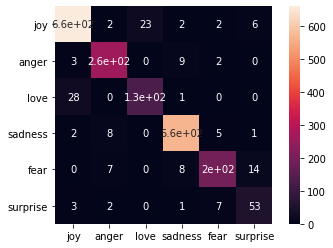

In [66]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y_test,Y_pred)
labels =['joy','anger','love','sadness','fear','surprise']
sns.heatmap(cm,annot=True,square=True,xticklabels=labels,yticklabels=labels)

In [67]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       695
           1       0.93      0.95      0.94       275
           2       0.85      0.82      0.83       159
           3       0.96      0.97      0.97       581
           4       0.92      0.87      0.90       224
           5       0.72      0.80      0.76        66

    accuracy                           0.93      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.93      0.93      0.93      2000



In [ ]:
def get_key(value):
    dictionary={'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5}
    for key,val in dictionary.items():
          if (val==value):
            return key
def predict(sentence):
  s=[]
  s.append(sentence)
  s_seq=tokenizer.texts_to_sequences(s)
  s_padded=pad_sequences(s_seq,maxlen=80,padding='post')
  ans=get_key(model.predict_classes(s_padded))
  print("The emotion predicted is",ans)



In [ ]:
predict(str(input('Enter a sentence : ')))

Enter a sentence : I am very disappointed with this kind of front camera. Need refund.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


The emotion predicted is sadness


In [ ]:
import pickle as pkl
model.save('model.h5')
with open('tokenizer.pkl', 'wb') as f:
   pkl.dump(tokenizer, f)

In [61]:
m = tf.keras.models.load_model('model.h5')

In [60]:
!pip list

Package                       Version        
----------------------------- ---------------
absl-py                       0.10.0         
alabaster                     0.7.12         
albumentations                0.1.12         
altair                        4.1.0          
argon2-cffi                   20.1.0         
asgiref                       3.3.1          
astor                         0.8.1          
astropy                       4.1            
astunparse                    1.6.3          
async-generator               1.10           
atari-py                      0.2.6          
atomicwrites                  1.4.0          
attrs                         20.3.0         
audioread                     2.1.9          
autograd                      1.3            
Babel                         2.9.0          
backcall                      0.2.0          
base58                        2.0.1          
beautifulsoup4                4.6.3          
bleach                        3.2.